# Churn Modelling


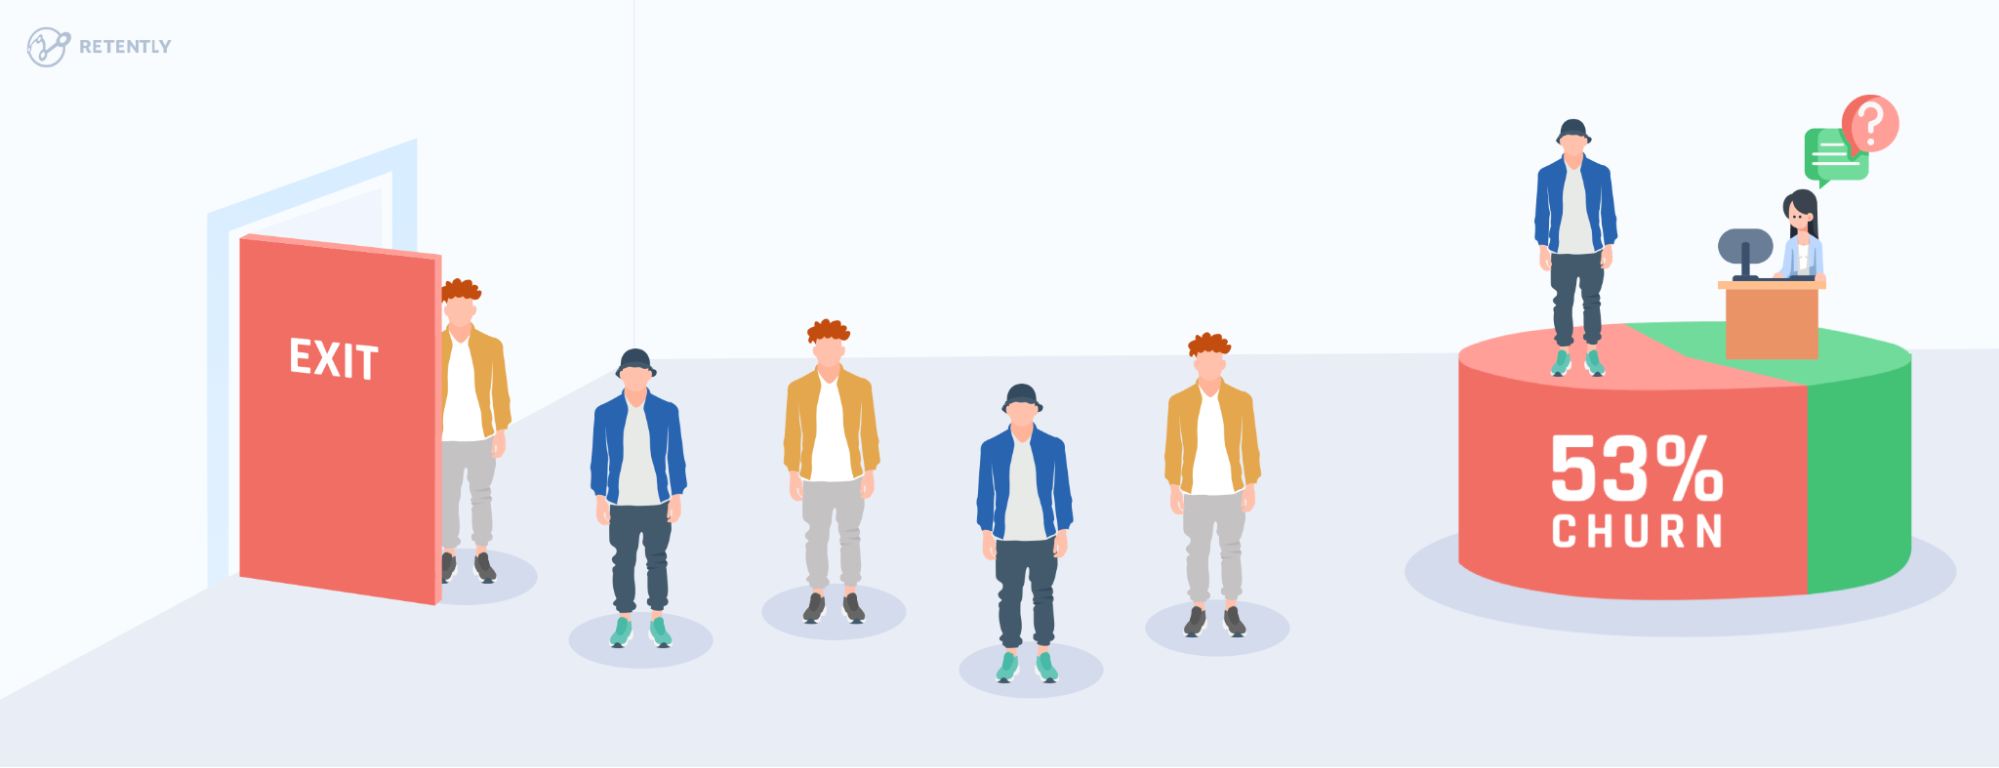

 imagesource: https://www.retently.com/wp-content/uploads/2015/11/leading-causes-of-churn-1.png

##### This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [185]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [186]:
df = pd.read_csv("Churn_Modelling.csv")

In [187]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [188]:
df.shape

(10000, 14)

In [189]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [190]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Drop columns**

In [191]:
df.drop(['RowNumber', 'CustomerId','CreditScore', 'Surname' ], axis=1,  inplace= True)

print(df.columns.values)

['Geography' 'Gender' 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard'
 'IsActiveMember' 'EstimatedSalary' 'Exited']


In [192]:
import tensorflow as tf

In [193]:
print(tf. __version__)

2.9.1


In [194]:
df.dtypes

Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [195]:
from sklearn.preprocessing import OneHotEncoder

In [196]:
# Converting type of columns to category
df['Geography']=df['Geography'].astype('category')
df['Gender']=df['Gender'].astype('category')
 

In [197]:
#Assigning numerical values and storing it in another columns
df['Geography_new']=df['Geography'].cat.codes
df['Gender_new']=df['Gender'].cat.codes

In [198]:
enc=OneHotEncoder()

In [199]:
enc_df=pd.DataFrame(enc.fit_transform(df[['Geography_new','Gender_new']]).toarray())
 
#Merge with main
New_df=df.join(enc_df)
 
print(New_df)

     Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0       France  Female   42       2       0.00              1          1   
1        Spain  Female   41       1   83807.86              1          0   
2       France  Female   42       8  159660.80              3          1   
3       France  Female   39       1       0.00              2          0   
4        Spain  Female   43       2  125510.82              1          1   
...        ...     ...  ...     ...        ...            ...        ...   
9995    France    Male   39       5       0.00              2          1   
9996    France    Male   35      10   57369.61              1          1   
9997    France  Female   36       7       0.00              1          0   
9998   Germany    Male   42       3   75075.31              2          1   
9999    France  Female   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_new  Gender_new    0  \
0     

In [200]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['Geography','Gender'])
print(one_hot_encoded_data)

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      42       2       0.00              1          1               1   
1      41       1   83807.86              1          0               1   
2      42       8  159660.80              3          1               0   
3      39       1       0.00              2          0               0   
4      43       2  125510.82              1          1               1   
...   ...     ...        ...            ...        ...             ...   
9995   39       5       0.00              2          1               0   
9996   35      10   57369.61              1          1               1   
9997   36       7       0.00              1          0               1   
9998   42       3   75075.31              2          1               0   
9999   28       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Geography_new  Gender_new  Geography_France  \
0           101348.88       1    

In [201]:
df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_new,Gender_new
0,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


In [202]:
df.drop(['Geography', 'Gender'], axis=1,  inplace= True)

print(df.columns.values)

['Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited' 'Geography_new' 'Gender_new']


In [203]:
df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_new,Gender_new
0,42,2,0.00,1,1,1,101348.88,1,0,0
1,41,1,83807.86,1,0,1,112542.58,0,2,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,2,0


In [204]:
df.dtypes

Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Geography_new         int8
Gender_new            int8
dtype: object

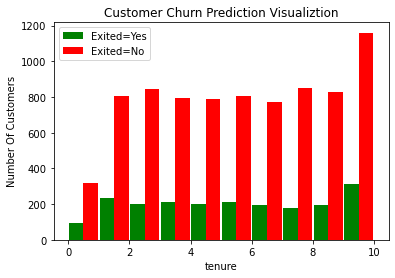

In [205]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

 

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [206]:
X = df.drop(['Exited'], axis= 1)
y= df['Exited']

In [207]:
X.shape

(10000, 9)

In [208]:
y.shape

(10000,)

In [214]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [216]:
from sklearn.preprocessing import StandardScaler

In [220]:
sc = StandardScaler()

In [223]:
x = sc.fit_transform(X)
x = sc.fit_transform(x)

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [236]:
X_train.shape

(8000, 9)

In [237]:
X_test.shape

(2000, 9)

In [238]:
x[0]

array([ 0.29351742, -1.04175968, -1.22584767, -0.91158349,  0.64609167,
        0.97024255,  0.02188649, -0.90188624, -1.09598752])

In [239]:
shape = x[0].shape
shape

(9,)

In [241]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=shape, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,validation_split = 0.1, epochs=100)

Epoch 1/100
225/225 [==============================] - 13s 12ms/step - loss: 0.5080 - accuracy: 0.7693 - val_loss: 0.4307 - val_accuracy: 0.8125
Epoch 2/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4298 - accuracy: 0.8151 - val_loss: 0.4020 - val_accuracy: 0.8388
Epoch 3/100
225/225 [==============================] - 1s 5ms/step - loss: 0.4060 - accuracy: 0.8324 - val_loss: 0.3714 - val_accuracy: 0.8562
Epoch 4/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3833 - accuracy: 0.8424 - val_loss: 0.3435 - val_accuracy: 0.8700
Epoch 5/100
225/225 [==============================] - 2s 7ms/step - loss: 0.3675 - accuracy: 0.8500 - val_loss: 0.3296 - val_accuracy: 0.8737
Epoch 6/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3592 - accuracy: 0.8526 - val_loss: 0.3207 - val_accuracy: 0.8700
Epoch 7/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3535 - accuracy: 0.8568 - val_loss: 0.3153 - val_accuracy: 0.87

Epoch 58/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3127 - accuracy: 0.8700 - val_loss: 0.3159 - val_accuracy: 0.8750
Epoch 59/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3124 - accuracy: 0.8707 - val_loss: 0.3208 - val_accuracy: 0.8800
Epoch 60/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3126 - accuracy: 0.8685 - val_loss: 0.3193 - val_accuracy: 0.8737
Epoch 61/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3119 - accuracy: 0.8700 - val_loss: 0.3191 - val_accuracy: 0.8737
Epoch 62/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3119 - accuracy: 0.8714 - val_loss: 0.3211 - val_accuracy: 0.8725
Epoch 63/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3119 - accuracy: 0.8715 - val_loss: 0.3216 - val_accuracy: 0.8737
Epoch 64/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3116 - accuracy: 0.8704 - val_loss: 0.3198 - val_accuracy:

In [242]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 4ms/step - loss: 0.3681 - accuracy: 0.8485


[0.3680826723575592, 0.8485000133514404]

In [243]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 1s 4ms/step


array([[0.01053023],
       [0.04958237],
       [0.04550229],
       [0.08779217],
       [0.10981054]], dtype=float32)

In [244]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [245]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [246]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [247]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.69      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

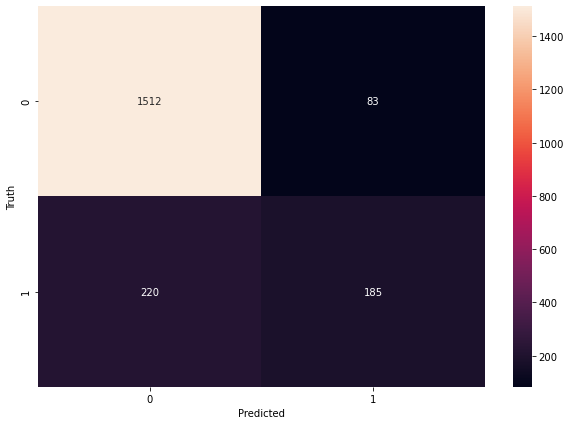

In [248]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [250]:
y_test.shape

(2000,)

In [252]:
# Accuracy
round((1512+185)/(1512+185+83+220),2)

0.85

In [ ]:
# Precision for 0 class. i.e. Precision for customers who did not churn

round(862/(862+179),2)